# <div style = 'background-color:#4D7C8A'> <center><font color='#8FAD88'>Machine Learning aplicado a la retención de clientes bancarios: Predicción de abandono</div>
---

#### En este notebook aplico técnicas de Machine Learning para analizar y predecir la probabilidad de que los clientes de un banco abandonen el servicio. Comienzo con la preparación de los datos, incluyendo limpieza y escalado, seguida de un análisis exploratorio para entender la composición del dataset, presentando gráficos de las métricas clave.

#### Luego, implemento y comparo tres algoritmos comúnmente utilizados en problemas de predicción de abandono de clientes: Random Forest, XGBoost y una Red Neuronal, evaluando su desempeño a través de métricas relevantes como precisión, recall y exactitud. Finalmente, selecciono el modelo más adecuado para realizar predicciones de prueba y demostrar su aplicación práctica.

#### Indice

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Preparación y limpieza de los datos](#0)<br>
2.  [Analisis exploratorio de los datos](#1)<br>
3.  [Modelado y evaluación](#2) <br>
4.  [Concluciones](#3) <br>

</div>

## <div style = 'background-color:black'> <center><font color='white'>① Preparación y limpieza de los datos </font></div> <a id="0"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Abandonoclientesbancarios.csv")

In [3]:
df.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8664,8665,15666332,Donaldson,690,Spain,Female,48,2,0.00,2,1,1,3149.10,0
2105,2106,15615096,Costa,492,France,Female,31,7,0.00,2,1,1,49463.44,0
5150,5151,15614716,Okwudilichukwu,515,France,Female,37,0,196853.62,1,1,1,132770.11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum() # Mostrar valores nulos

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Cambio nombre de columnas.
headers = ["ID", "IDcliente", "Apellido", "Score", "Pais", "Genero", "Edad", "Antigüedad", "Balance", "Productos", "Tarj.Credito", "Activo", "Salario", "Abandono"]
df.columns = headers

In [8]:
# Elimino columnas que no voy a utilizar en el analisis.
df = df.drop(columns=['ID'])
df = df.drop(columns=['IDcliente'])
df = df.drop(columns=['Apellido'])

In [9]:
df.sample(3)

,Score,Pais,Genero,Edad,Antigüedad,Balance,Productos,Tarj.Credito,Activo,Salario,Abandono
405,718,France,Male,36,9,0.0,1,1,0,45909.87,0
4660,537,France,Female,41,0,0.0,2,0,1,175262.49,0
971,723,France,Male,25,3,0.0,2,1,1,134509.47,0


## <div style = 'background-color:black'> <center><font color='white'>② Analisis exploratorio de los datos (EDA) </font></div><a id="1"></a>

In [10]:
df["Abandono"].value_counts()

0    7963
1    2037
Name: Abandono, dtype: int64

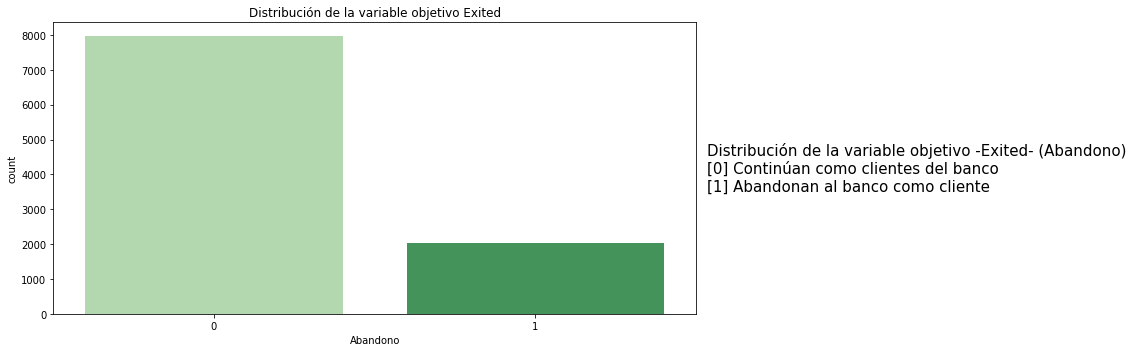

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={'width_ratios':[3, 1]})

# Aca grafico con barras para ver la distribución.
sns.countplot(x='Abandono', data=df, palette="Greens", ax=ax[0])
ax[0].set_title('Distribución de la variable objetivo Exited')

# Creo un nuevo grafico a la izquierda con los datos del gráfico.
ax[1].axis('off')  # Sentencia para ocultar los ejes y figure en blanco.
textstr = "Distribución de la variable objetivo -Exited- (Abandono)\n[0] Continúan como clientes del banco\n[1] Abandonan al banco como cliente"
ax[1].text(0, 0.5, textstr, fontsize=15, va='center')

plt.tight_layout()
plt.show()


In [12]:
print(df.Pais.value_counts())
print("--------------------------")
print(df.Genero.value_counts())
print("--------------------------")
df.Activo.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Pais, dtype: int64
--------------------------
Male      5457
Female    4543
Name: Genero, dtype: int64
--------------------------


1    5151
0    4849
Name: Activo, dtype: int64

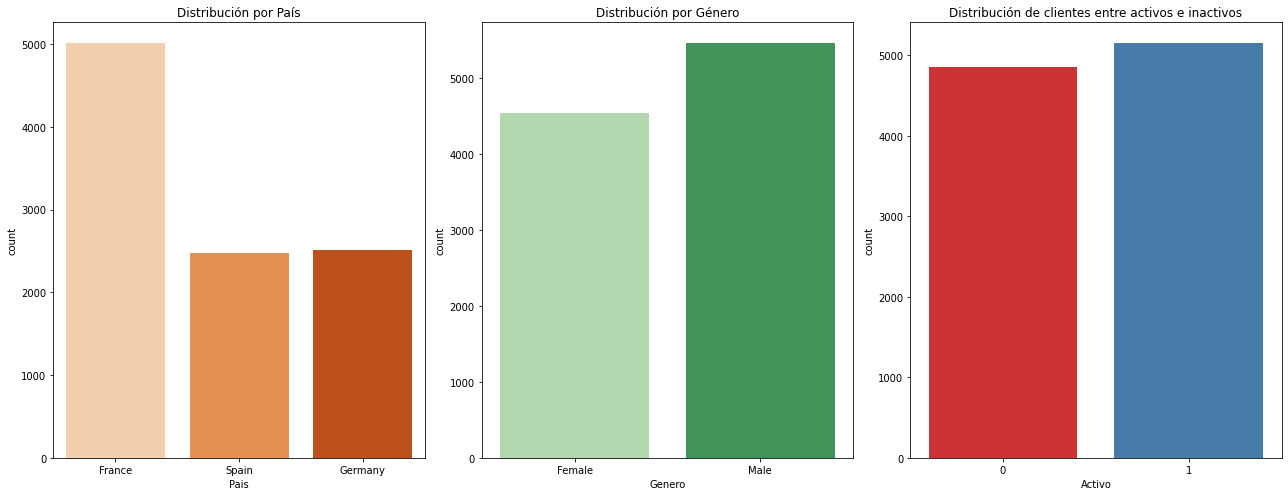

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 7))  # acá modifico para mostrar 1 fila y 3 columnas

sns.countplot(x='Pais', data=df, ax=axes[0], palette="Oranges") # Gráfico País
axes[0].set_title('Distribución por País')

sns.countplot(x='Genero', data=df, ax=axes[1], palette="Greens") # Gráfico Género
axes[1].set_title('Distribución por Género')

sns.countplot(x='Activo', data=df, ax=axes[2], palette="Set1") # Gráfico Activo
axes[2].set_title('Distribución de clientes entre activos e inactivos')

plt.tight_layout()  # ajusta espacios
plt.show()

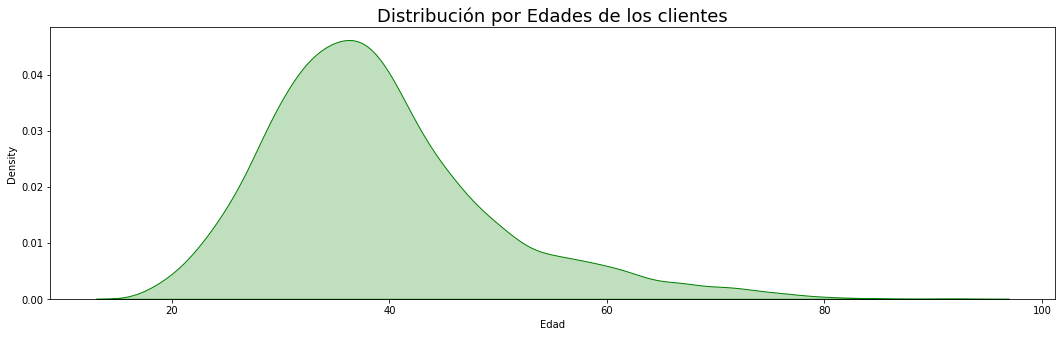

In [14]:
plt.figure(figsize=(18, 5))
sns.kdeplot(df['Edad'], color='Green', fill=True)
plt.title('Distribución por Edades de los clientes', fontsize=18)
plt.grid(False)
plt.show()

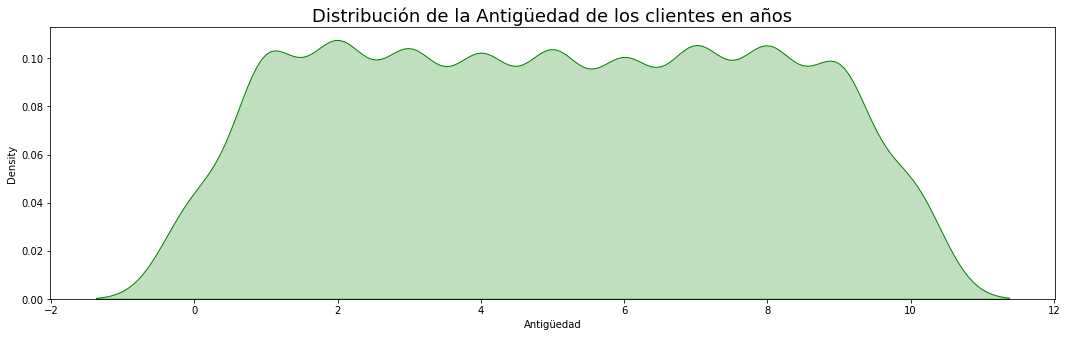

In [15]:
plt.figure(figsize=(18, 5))
sns.kdeplot(df['Antigüedad'], color='Green', fill=True)
plt.title('Distribución de la Antigüedad de los clientes en años', fontsize=18)
plt.grid(False)
plt.show()

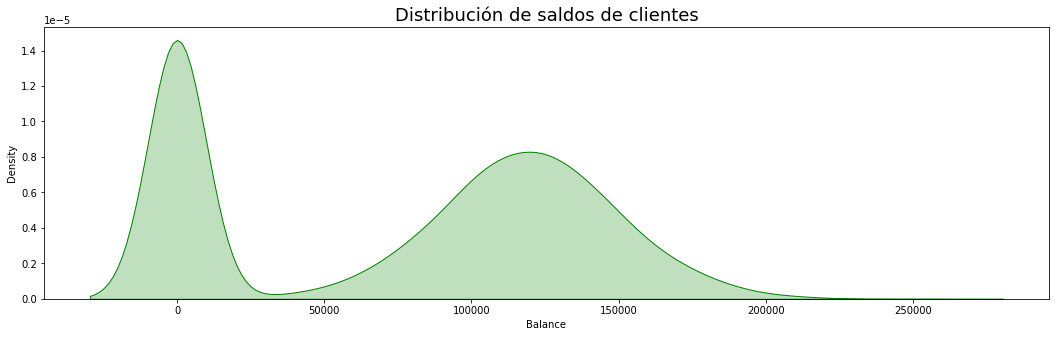

In [16]:
plt.figure(figsize=(18, 5))
sns.kdeplot(df['Balance'], color='Green', fill=True)
plt.title('Distribución de saldos de clientes', fontsize=18)
plt.grid(False)
plt.show()

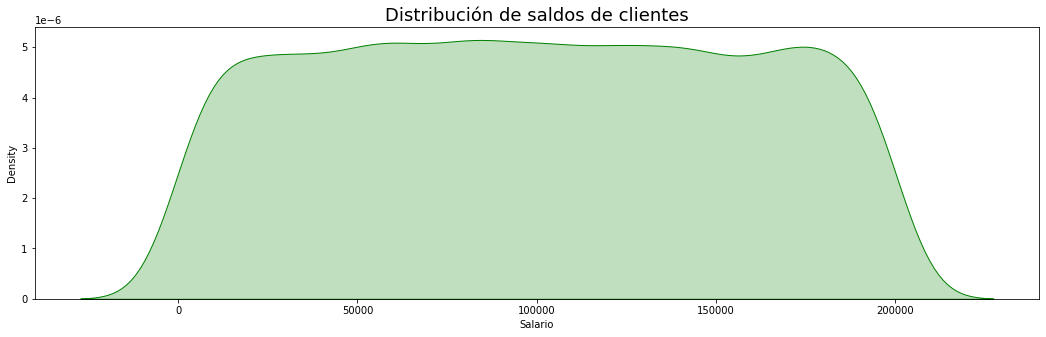

In [17]:
plt.figure(figsize=(18, 5))
sns.kdeplot(df['Salario'], color='Green', fill=True)
plt.title('Distribución de saldos de clientes', fontsize=18)
plt.grid(False)
plt.show()

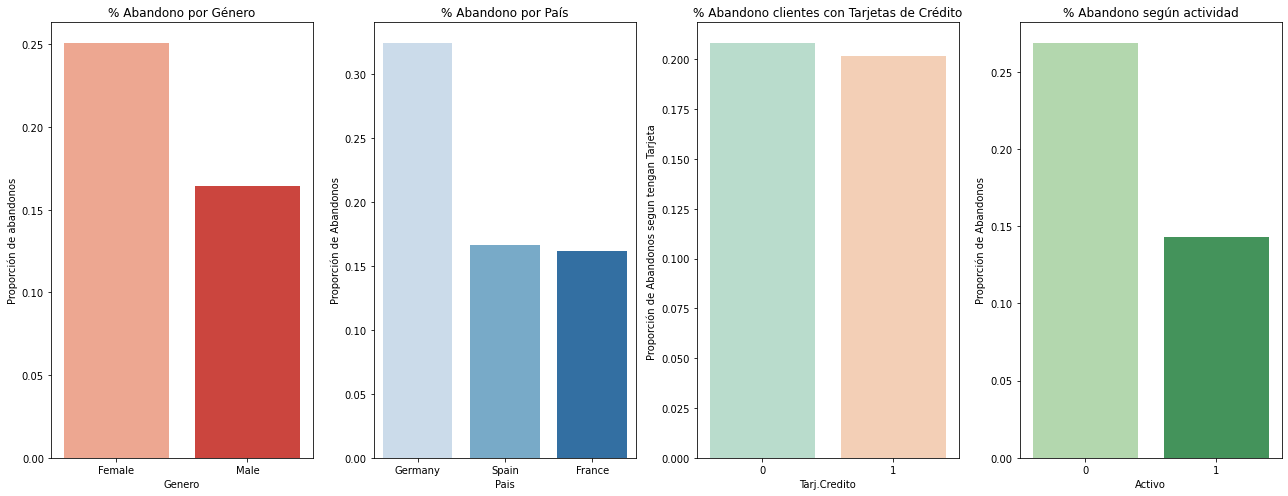

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(18, 7))  # 2 gráficos en una fila

abandono_genero = df.groupby('Genero')['Abandono'].mean()
sns.barplot(x=abandono_genero.index, y=abandono_genero.values, ax=axes[0], palette="Reds")
axes[0].set_ylabel("Proporción de abandonos")
axes[0].set_title("% Abandono por Género")

abandono_pais = df.groupby('Pais')['Abandono'].mean().sort_values(ascending=False)
sns.barplot(x=abandono_pais.index, y=abandono_pais.values, ax=axes[1], palette="Blues")
axes[1].set_ylabel("Proporción de Abandonos")
axes[1].set_title("% Abandono por País")
axes[1].tick_params(axis='x')  

abandono_pais = df.groupby('Tarj.Credito')['Abandono'].mean().sort_values(ascending=False)
sns.barplot(x=abandono_pais.index, y=abandono_pais.values, ax=axes[2], palette="Pastel2")
axes[2].set_ylabel("Proporción de Abandonos segun tengan Tarjeta ")
axes[2].set_title("% Abandono clientes con Tarjetas de Crédito")
axes[2].tick_params(axis='x')  

abandono_pais = df.groupby('Activo')['Abandono'].mean().sort_values(ascending=False)
sns.barplot(x=abandono_pais.index, y=abandono_pais.values, ax=axes[3], palette="Greens")
axes[3].set_ylabel("Proporción de Abandonos")
axes[3].set_title("% Abandono según actividad")
axes[3].tick_params(axis='x')  

plt.tight_layout()
plt.show()

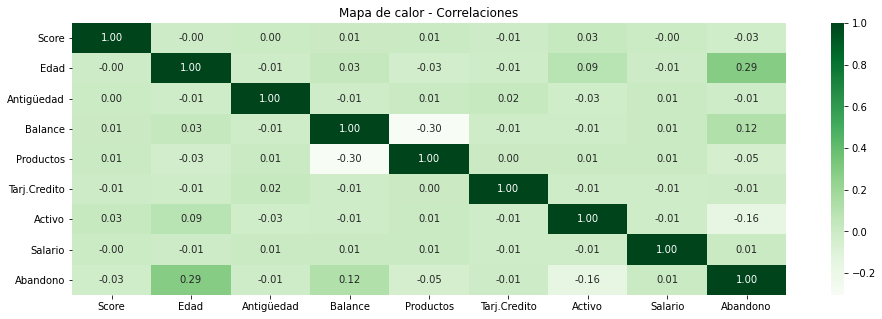

In [19]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Greens')
plt.title('Mapa de calor - Correlaciones')
plt.show()

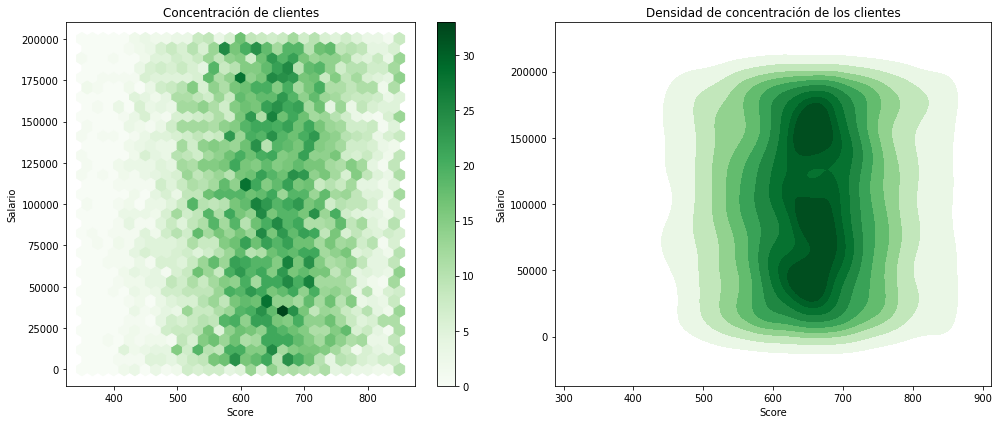

Cada hexágono representa cuántos clientes caen en ese rango de la comparación entre Score vs Salario
Hexágonos oscuros → muchos clientes, claros → pocos clientes


In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grafico Hexbin
hb = axes[0].hexbin(df["Score"], df["Salario"], gridsize=30, cmap="Greens")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Salario")
axes[0].set_title("Concentración de clientes")
fig.colorbar(hb, ax=axes[0])

# Mapa de calor
sns.kdeplot(x="Score", y="Salario", data=df, fill=True, cmap="Greens", ax=axes[1])
axes[1].set_xlabel("Score")
axes[1].set_ylabel("Salario")
axes[1].set_title("Densidad de concentración de los clientes")

plt.tight_layout()
plt.show()

print("Cada hexágono representa cuántos clientes caen en ese rango de la comparación entre Score vs Salario\nHexágonos oscuros → muchos clientes, claros → pocos clientes")

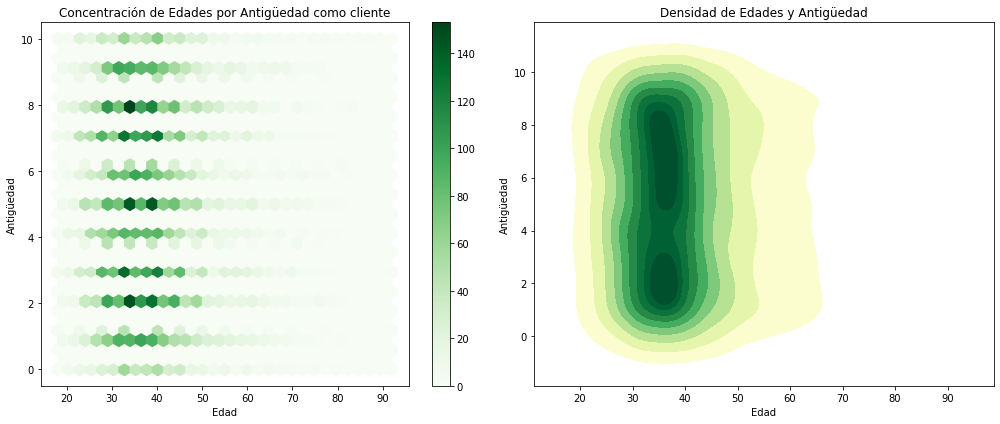

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

hb = axes[0].hexbin(df["Edad"], df["Antigüedad"], gridsize=30, cmap="Greens") # Grafico Hexbin
axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Antigüedad")
axes[0].set_title("Concentración de Edades por Antigüedad como cliente")
fig.colorbar(hb, ax=axes[0])

sns.kdeplot(x="Edad", y="Antigüedad", data=df, fill=True, cmap="YlGn", ax=axes[1]) # Mapa de calor
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Antigüedad")
axes[1].set_title("Densidad de Edades y Antigüedad")

plt.tight_layout()
plt.show()

## <div style = 'background-color:Black'> <center><font color='white'>③ Modelado y evaluación </font></div><a id="2"></a>

In [22]:
# Para los modelos que voy a utilizar hace falta que sean todas los campos numéricos. Aca veo cuales tengo que transformar.
df.dtypes

Score             int64
Pais             object
Genero           object
Edad              int64
Antigüedad        int64
Balance         float64
Productos         int64
Tarj.Credito      int64
Activo            int64
Salario         float64
Abandono          int64
dtype: object

In [23]:
# Reemplazo los valores de genero por números, en este caso no hay un orden de prelación asi que puedo simplemente cambiar los valores
df["Genero"] = df["Genero"].replace({"Male": 1, "Female": 0})

In [24]:
# En la columna "Pais" hay 3 valores diferentes, no puede haber un orden por lo que debo transformar los valores creando una columna por pais.
df = pd.get_dummies(df, columns=["Pais"], drop_first=False) #drop_first=False (no elimina la primera columna para arboles, etc), debe ser TRUE para modelos lineales

In [25]:
df.sample(3)

,Score,Genero,Edad,Antigüedad,Balance,Productos,Tarj.Credito,Activo,Salario,Abandono,Pais_France,Pais_Germany,Pais_Spain
1169,653,0,38,8,102133.38,1,1,1,166520.96,0,1,0,0
2769,580,0,38,1,128218.47,1,1,0,125953.83,1,0,1,0
273,707,1,30,8,0.00,2,1,0,33159.37,0,1,0,0


## ❑ Random Forest (Bosques Aleatorios)

In [26]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Abandono"] # Aca le pido que Y sea mi objetivo a predecir
X = data.drop(["Abandono"], axis=1) # Aplico que X sean todas las columnas menos la del objetivo.
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.33,
                                     random_state=42)

In [28]:
model = RandomForestClassifier(random_state=10, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)
print(f"La precisión del Random Forest es: {model.score(X_test, y_test)}")

La precisión del Random Forest es: 0.8684848484848485


Listado de hiperparametros:

- n_estimators | Cantidad de árboles en el bosque (en este caso aumentarlo no tiene sentido puesto que no mejoro el resultado.
- max_depth	| Profundidad máxima de cada árbol.
- min_samples_split | Mínimo de muestras necesarias para dividir un nodo (no obtuve mejor resultado usándolo).
- min_samples_leaf | Mínimo de muestras en una hoja	(empeora los resultados en este caso).
- max_features | Número de variables a considerar en cada división
- bootstrap | Si usar o no muestreo con reemplazo (no lo incluyo porque empeora los resultados).
- criterion	| Puede ser "gini" (por defecto) o "entropy" tampoco mejora el rendimiento.
- class_weight | Peso de las clases.

In [29]:
classifier=model.fit(X_train, y_train) #Construimos el modelo sobre los datos de entrenamiento

In [30]:
predictions=classifier.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.1315151515151515


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.77      0.46      0.58       643

    accuracy                           0.87      3300
   macro avg       0.83      0.71      0.75      3300
weighted avg       0.86      0.87      0.85      3300

0.8684848484848485


<AxesSubplot:>

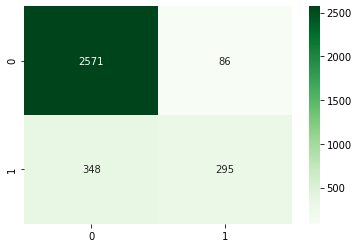

In [33]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')



In [34]:
# Aca bajo el umbral de 0,5 a 0,3 intentando mejorar los resultados (tratando de detectar mas abandonos).
y_prob = model.predict_proba(X_test)[:, 1]
y_pred_adj = (y_prob >= 0.3).astype(int)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2657
           1       0.56      0.66      0.61       643

    accuracy                           0.83      3300
   macro avg       0.74      0.77      0.75      3300
weighted avg       0.85      0.83      0.84      3300

0.8333333333333334


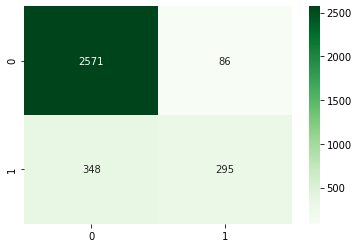

In [35]:
# Nueva matriz de confusion (que toma los valores de "Y_pred_adj" son las generadas arriba con umbral 0,3
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_adj))
print(accuracy_score(y_test, y_pred_adj))

<div class="alert alert-warning">Bajar el umbral mejora recall de la clase minoritaria, a costa de bajar precision y accuracy global. Para un modelo de estudio
de abandono de clientes seria deseable, porque detectar a los clientes que se van es más importante que predecir perfectamente a los que se quedan.
</div>

## ❑ XGBoost

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(["Abandono"], axis=1)   # Excluimos Abandono y se podria excluir alguna otra no relevantes
y = df["Abandono"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [37]:
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print("Proporción de clases:", ratio)
print()
print("Muestra el resultado, indicando cuántas veces es más frecuente la clase mayoritaria que la minoritaria.")
print("Un valor cercano a 1 = clases equilibradas. Un valor muy alto = desbalance de clases.")

Proporción de clases: 3.908835904628331

Muestra el resultado, indicando cuántas veces es más frecuente la clase mayoritaria que la minoritaria.
Un valor cercano a 1 = clases equilibradas. Un valor muy alto = desbalance de clases.


In [38]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,  # balanceo las clases
    eval_metric="auc"
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("AUC:", roc_auc_score(y_test, y_prob))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))


AUC: 0.8718985475573738

Matriz de confusión:
 [[2021  368]
 [ 165  446]]

               precision    recall  f1-score   support

           0       0.92      0.85      0.88      2389
           1       0.55      0.73      0.63       611

    accuracy                           0.82      3000
   macro avg       0.74      0.79      0.75      3000
weighted avg       0.85      0.82      0.83      3000



<div class="alert alert-warning">El modelo XGBoost obtuvo el mejor rendimiento general (accuracy = 0.82, f1-score = 0.63), logrando un equilibrio 
adecuado entre precisión y recall sin necesidad de ajustar el umbral (como en el modelo de Random Forest). Por lo tanto se considera más robusto y equilibrado para predecir el abandono de clientes en este conjunto de datos.
</div>



## ❑ Redes Neuronales (PyTorch)

Voy a implementar un modelo de red neuronal con el objetivo de explorar posibles relaciones no lineales entre las variables que los modelos basados en árboles, como los utilizados anteriormente (Random Forest y XGBoost) podrían no haber captado completamente. las redes neuronales poseen la capacidad de modelar interacciones complejas y patrones no evidentes en los datos lo cual puede resultar útil. Como paso previo indispensable, procedo a escalar las variables numéricas

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [41]:
# Comprobar si el escalado esta bien. Tiene que ser valores entre 0 y 1 para minmax scaler.
print("Min:", np.min(X_train_scaled))
print("Max:", np.max(X_train_scaled))


Min: 0.0
Max: 1.0000000000000002


In [42]:
# Importo librerias de PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [43]:
# Convertir arrays de NumPy (PyTorch no trabaja con arrays de Numpy) a tensores
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [44]:
# Definir la red neuronal para predecir abandono de clientes.
class RedNeuroAbandono(nn.Module):
    def __init__(self, n_features):
        super(RedNeuroAbandono, self).__init__()
        # Defino la red como una secuencia de capas
        self.red = nn.Sequential(
            nn.Linear(n_features, 32),
            nn.ReLU(),
            nn.Linear(32, 16),   # capa oculta 1 toma "n" características y devuelve "n" salidas
            nn.ReLU(),                  # función de activación de la primer capa (nn.Sigmoid, nn.Tanh, nn.LeakyReLU)
            nn.Linear(16, 8),           # capa oculta 2 recibe 16 entradas de la capa anterior y produce 8 salidas
            nn.ReLU(),                   # función de activación de la segunda capa
            nn.Linear(8, 1),            # salida de 1 solo valor porque es una clasificación binaria.
            nn.Sigmoid()                # funcion de activación de salida, sigmoid restringe para que la salida sea entre 0 y 1.
        )

    def forward(self, x):
        return self.red(x)

# Creo el modelo
modelo = RedNeuroAbandono(X_train_t.shape[1])


In [45]:
criterio = nn.BCELoss() # Binary Cross Entropy (para clasificación binaria), penaliza más al modelo cuando se equivoca y menos cuando acierta.
optimizador = optim.Adam(modelo.parameters(), lr=0.01) # Algoritmo que ajusta los pesos de la red para minimizar la funcion de pérdida (que es BCELoss)
# lr=0,01 es la tasa de aprendizaje, muy pequeño tardaría mucho en aprender.

In [46]:
for epoch in range(200):
    # Forward
    y_pred = modelo(X_train_t)
    loss = criterio(y_pred, y_train_t)
    
    # Backward
    optimizador.zero_grad()
    loss.backward()
    optimizador.step()

    if (epoch+1) % 20 == 0:
        print(f"Época {epoch+1}/200 - Pérdida: {loss.item():.4f}")


Época 20/200 - Pérdida: 0.4854
Época 40/200 - Pérdida: 0.4645
Época 60/200 - Pérdida: 0.4503
Época 80/200 - Pérdida: 0.4284
Época 100/200 - Pérdida: 0.4176
Época 120/200 - Pérdida: 0.4033
Época 140/200 - Pérdida: 0.3797
Época 160/200 - Pérdida: 0.3527
Época 180/200 - Pérdida: 0.3368
Época 200/200 - Pérdida: 0.3305


In [47]:
with torch.no_grad():
    y_pred_test = modelo(X_test_t)
    y_pred_bin = (y_pred_test >= 0.3).float()

acc = accuracy_score(y_test_t, y_pred_bin)
print("Accuracy:", acc)
print("Matriz de confusión:\n", confusion_matrix(y_test_t, y_pred_bin))
print("Reporte:\n", classification_report(y_test_t, y_pred_bin))


Accuracy: 0.8533333333333334
Matriz de confusión:
 [[2175  214]
 [ 226  385]]
Reporte:
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      2389
         1.0       0.64      0.63      0.64       611

    accuracy                           0.85      3000
   macro avg       0.77      0.77      0.77      3000
weighted avg       0.85      0.85      0.85      3000



In [48]:
print(modelo)


RedNeuroAbandono(
  (red): Sequential(
    (0): Linear(in_features=12, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


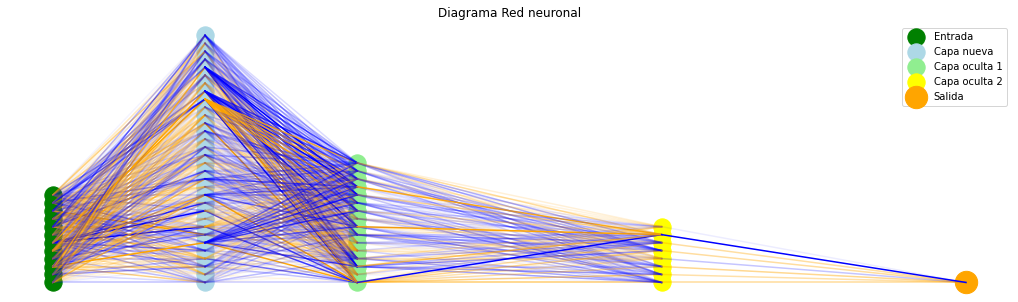

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Función para dibujar conexiones entre capas
def dibujar_conexiones(pesos, x0, y0, x1, y1):
    for i in range(pesos.shape[0]):      # neuronas de capa siguiente
        for j in range(pesos.shape[1]):  # neuronas de capa anterior
            color = 'blue' if pesos[i, j] > 0 else 'orange'
            alpha = min(1, abs(pesos[i, j]))  # transparencia según magnitud
            plt.plot([x0[j], x1[i]], [y0[j], y1[i]], color=color, alpha=alpha)

pesos_c0 = modelo.red[0].weight.data.numpy()   # capa 1
pesos_c1 = modelo.red[2].weight.data.numpy()   # capa 2
pesos_c2 = modelo.red[4].weight.data.numpy()   # capa 3
pesos_out = modelo.red[6].weight.data.numpy()  # capa salida

# Posiciones de neuronas en el grafico
n_input = pesos_c0.shape[1]
n_c0 = pesos_c0.shape[0]
n_c1 = pesos_c1.shape[0]
n_c2 = pesos_c2.shape[0]
n_out = pesos_out.shape[0]

x_input = np.zeros(n_input)
y_input = np.arange(n_input)

x_c0 = np.ones(n_c0) * 0.5
y_c0 = np.arange(n_c0)

x_c1 = np.ones(n_c1) * 1
y_c1 = np.arange(n_c1)

x_c2 = np.ones(n_c2) * 2
y_c2 = np.arange(n_c2)

x_out = np.ones(n_out) * 3
y_out = np.arange(n_out)

plt.figure(figsize=(18, 5))

# Dibujar conexiones entre las neuronas
dibujar_conexiones(pesos_c0, x_input, y_input, x_c0, y_c0)
dibujar_conexiones(pesos_c1, x_c0, y_c0, x_c1, y_c1)
dibujar_conexiones(pesos_c2, x_c1, y_c1, x_c2, y_c2)
dibujar_conexiones(pesos_out, x_c2, y_c2, x_out, y_out)

# Dibujar neuronas (tamaño, color y nombre)
plt.scatter(x_input, y_input, s=300, color='green', label='Entrada')
plt.scatter(x_c0, y_c0, s=300, color='lightblue', label='Capa nueva')
plt.scatter(x_c1, y_c1, s=300, color='lightgreen', label='Capa oculta 1')
plt.scatter(x_c2, y_c2, s=300, color='yellow', label='Capa oculta 2')
plt.scatter(x_out, y_out, s=500, color='orange', label='Salida')

plt.title("Diagrama Red neuronal")
plt.axis('off')
plt.legend()
plt.show()


<div class="alert alert-warning">Para mejorar la capacidad predictiva de mi modelo de red neuronal en la detección de clientes que podrían abandonar 
un servicio, realicé dos ajustes clave.
    
Primero, bajé el umbral de decisión (de 0,5 que es lo general a 0,3), lo que permitió que el modelo considerara más casos como “probables de abandono”. Esto ayuda a identificar mejor a los clientes realmente en riesgo. En términos prácticos, un modelo demasiado estricto podría pasar por alto clientes en riesgo, mientras que un umbral más ajustado ayuda a capturar patrones que quizas podrían haber quedado afuera.

Segundo, agregué una nueva capa oculta con 32 neuronas dentro de la red neuronal. Esta capa adicional le dio al modelo mayor capacidad para aprender relaciones y patrones más complejos en los datos. Es como si la red tuviera más filtros para analizar la información.

El resultado de estos cambios fue una mejora notable en las métricas clave de desempeño: aumentaron la precisión, el recall y la exactitud (accuracy). Esto significa que el modelo ahora predice con mayor fiabilidad qué clientes están en riesgo, reduciendo tanto los falsos negativos como los falsos positivos.</div>

## <div style = 'background-color:black'> <center><font color='white'>④ Conclusiones </font></div><a id="3"></a>

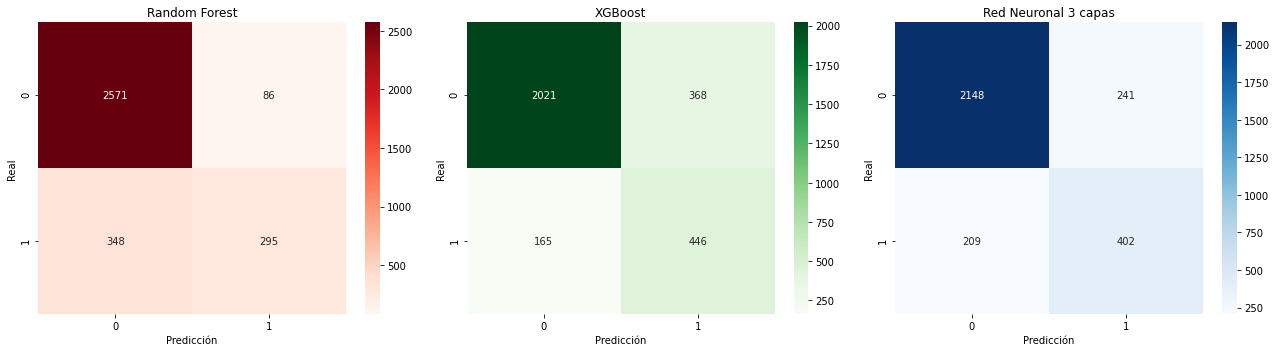

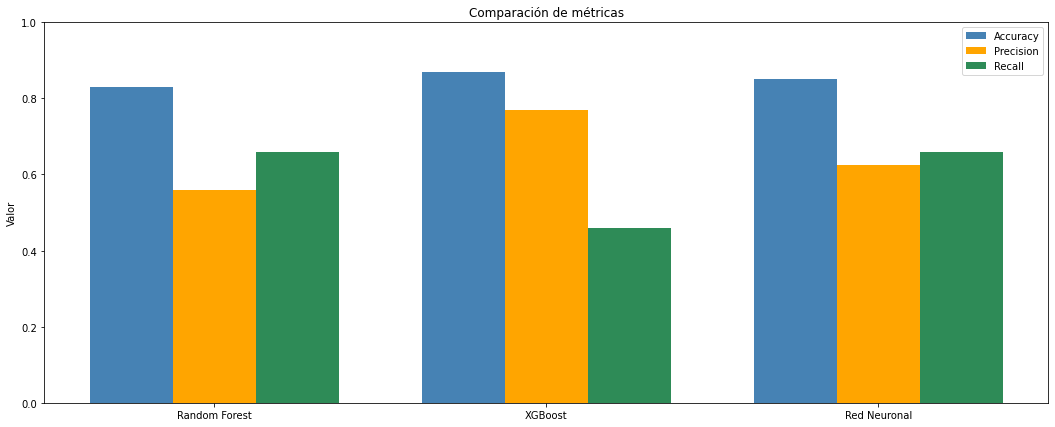

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Matrices de confusión
cm_rf = np.array([[2571, 86],
                  [348, 295]])  # Random Forest

cm_xgb = np.array([[2021, 368],
                   [165, 446]])  # XGBoost

cm_nn = np.array([[2148, 241],
                  [209, 402]])  # Red Neuronal 3 capas

# Métricas
metrics = {
    'Random Forest': {'Accuracy': 0.83, 'Precision': 0.56, 'Recall': 0.66},
    'XGBoost': {'Accuracy': 0.87, 'Precision': 0.77, 'Recall': 0.46},
    'Red Neuronal': {'Accuracy': 0.85, 'Precision': 0.625, 'Recall': 0.658}
}

# --- Plot de matrices de confusión ---
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title("Random Forest")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("XGBoost")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title("Red Neuronal 3 capas")
axes[2].set_xlabel("Predicción")
axes[2].set_ylabel("Real")

plt.tight_layout()
plt.show()

# Gráfico de las metricas
labels = list(metrics.keys())
accuracy = [metrics[m]['Accuracy'] for m in labels]
precision = [metrics[m]['Precision'] for m in labels]
recall = [metrics[m]['Recall'] for m in labels]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(x - width, accuracy, width, label='Accuracy', color='steelblue')
ax.bar(x, precision, width, label='Precision', color='orange')
ax.bar(x + width, recall, width, label='Recall', color='seagreen')

ax.set_ylabel('Valor')
ax.set_title('Comparación de métricas')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()

plt.show()


<div class="alert-warning">Para un problema de reducción de abandono de clientes, normalmente el objetivo principal es identificar a los clientes que van a abandonar el servicio (clase positiva, 1). Esto significa que el recall para la clase positiva suele ser más crítico que la precisión, porque perder un cliente (falso negativo) tiene mayor costo que predecir un abandono que no ocurre (falso positivo).
La red neuronal tiene un recall alto y balanceado con precision, lo que permite detectar más clientes en riesgo y no generar demasiados falsos positivos esto maximiza la detección de clientes en riesgo (de dejar de ser clientes).</div>

In [54]:
df.iloc[7167] # para ver esa columna especifica para copiar los valores y tratar de predecir su resultado (nota menos la columna "abandono").

Score              676.00
Genero               1.00
Edad                29.00
Antigüedad           7.00
Balance         131959.86
Productos            1.00
Tarj.Credito         0.00
Activo               0.00
Salario         189268.81
Abandono             0.00
Pais_France          1.00
Pais_Germany         0.00
Pais_Spain           0.00
Name: 7167, dtype: float64

In [52]:
Prueba_Valores = torch.tensor([[676, 1, 29, 7, 131959,86, 1, 0, 0, 189268.81, 0, 0]], dtype=torch.float32)

In [53]:
with torch.no_grad():  # evita calcular gradientes que no es necesario para probar.
    salida = modelo(Prueba_Valores)
print(salida)

tensor([[1.]])


<div class="alert-warning">Esto significa que, según los datos específicos de este cliente (edad, saldo, antigüedad en el servicio, características demográficas y cualquier otra variable en el modelo), la red neuronal predice que es muy probable que este cliente decida abandonar el servicio.
    Esta información puede ser útil para tomar decisiones preventivas, como diseñar estrategias de retención personalizadas o identificar patrones de comportamiento asociados con la pérdida de clientes</div>

---
✍️ Autor: Néstor Díaz — Contador Público | Analista de Datos | Machine Learning

📅 Proyecto: Machine Learning aplicado a la retención de clientes bancarios: Predicción de abandono

---